<a href="https://colab.research.google.com/github/HumbertoMezaRuiz/FisicaComputacional1/blob/main/Evaluacion3/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

In [2]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# ***Problema 1***


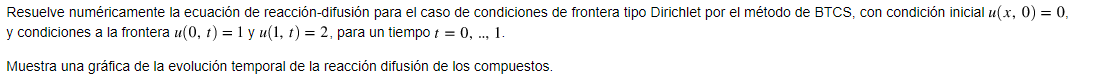

Para este problema, nos enfrentamos a una ecuación diferencial parcial con condiciones en la frontera tipo Dirichlet. Para ello, hemos rescatado el siguiente código en el cual estaremos resolviendo el problema comentando las partes en las cuales hemos hecho cambios para adaptarlo a éste problema dentro de recuadros marcados con "#".

True


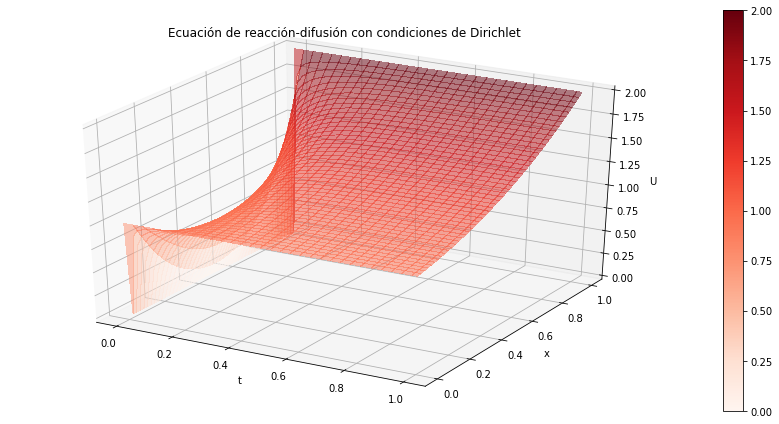

In [50]:
### Código obtenido de http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

           #####################################################################
x0 = 0     # Aquí señalamos el largo del tubo, el cual se nos pidió de largo=1 #
xL = 1     #####################################################################

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

           ##########################################################
t0 = 0     # Resolveremos y mostraremos la solución a este problema #
tF = 1.0   # para un tiempo t=0,...,1                               #
           ##########################################################

# ----- Time step -----
dt = (tF - t0)/(N - 1)

             #######################################
D = 1.0      # Usaremos los datos que se nos piden #
alpha = -1.0 # para D y alpha                      #
             #######################################

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----

              ##################################################################
U[:,0] = 0.0  # Esta condición nos debería mostrar una línea recta en U=0, t=0 #
              ##################################################################

#----- Dirichlet boundary conditions -----

                   ###################################################################
U[0,:] = 1.0       # Con estas condiciones debemos obtener para x=0 y x=1 dos líneas #
U[-1,:] = 2.0      # rectas, en U=1 y U=2, respectivamente                           #
                   ###################################################################

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Ecuación de reacción-difusión con condiciones de Dirichlet')

plt.tight_layout()
plt.show()

Como vemos, nuestras condiciones iniciales y de frontera están bien señaladas en la gráfica y los valores cobran sentido, la pequeña curvatura entre frontera y frontera, en este caso muy poco apreciable, es debido al término de la ecuación diferencial asociado a la reacción.

# ***Problema 2***


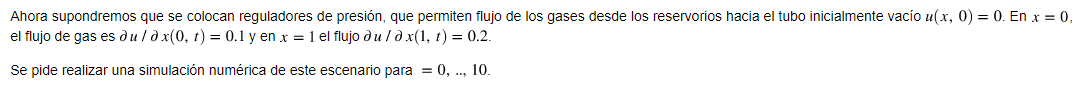

Para este problema, nos enfrentamos a una ecuación diferencial parcial con condiciones en la frontera tipo Neumann. Para ello, hemos rescatado el siguiente código en el cual estaremos resolviendo el problema comentando las partes en las cuales hemos hecho cambios para adaptarlo a éste problema dentro de recuadros marcados con "#".

True


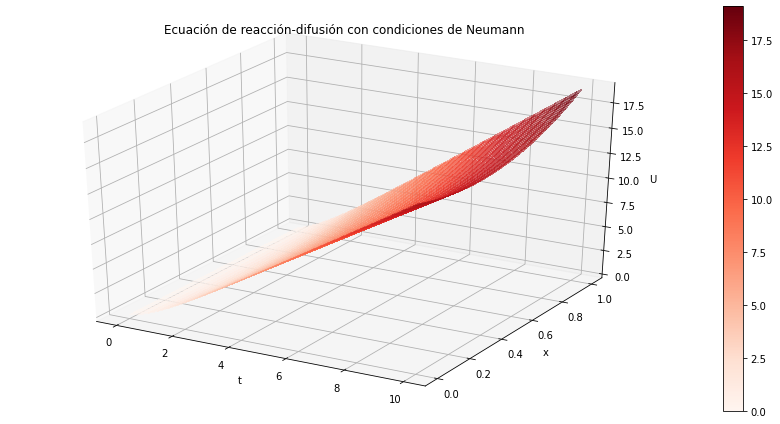

In [46]:
### Código obtenido de http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

           ####################################################
x0 = 0     # Nuevamente usaremos nuestras condiciones para el #
xL = 1     # largo del tubo                                   #
           ####################################################

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

           ##################################################
t0 = 0     # En esta ocasión resolveremos para t=0,...,10   #
tF = 10.0  ##################################################

# ----- Time step -----
dt = (tF - t0)/(N - 1)
             #####################################
D = 1.0      # Mismas condiciones para D y alpha #
alpha = -1.0 #####################################

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Neumann boundary conditions -----
                                
                              ##############################################
leftBC = np.arange(1, N+1)    # Con estas condiciones, las cuales señalan  #
f = leftBC*0.1                # derivadas constantes en la frontera, lo    #
                              # que deberíamos de obtener son pendientes   #
rightBC = np.arange(1, N+1)   # constantes en ambas fronteras, por lo que  #
g = rightBC*0.2               # será sencillo identificarlas en la gráfica #
                              ##############################################

for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Ecuación de reacción-difusión con condiciones de Neumann')

plt.tight_layout()
plt.show()

Como podemos observar, las fronteras y la condición inicial se muestran satisfactoriamente, y la pequeña curvatura que se aprecia entre frontera y frontera es fruto del término de la ecuación asociado al valor de alpha.

# ***Problema 3***

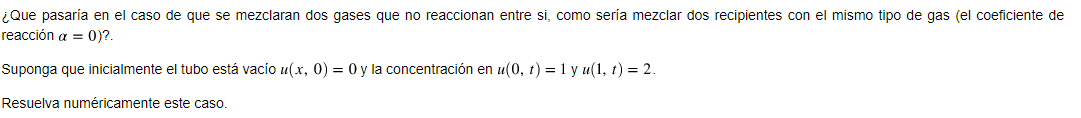

Si tenemos la ecuación de reacción-difusión con alpha=0, ésta se reduce a la ecuación de calor, en dónde la constante kappa sería en este caso la constante de difusión D. Para mostrar esto resolveremos la ecuación usando dos métodos, en primer lugar usaremos el código utilizado en el problema 1, y a continuación compararemos con el código usado en la Actividad10 para resolver la ecuación de calor.



True


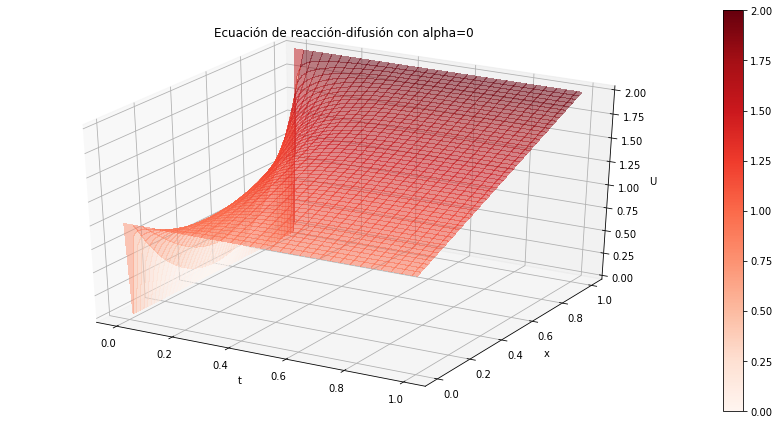

In [44]:
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1.0

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1.0  # Diffusion coefficient

            ##############################
alpha = 0.0 # Anulamos el valor de alpha #
            ##############################
          
r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = np.zeros(xspan.shape)

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
#ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
#ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Ecuación de reacción-difusión con alpha=0')

# Punto del observador 
#ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.19999999999999996


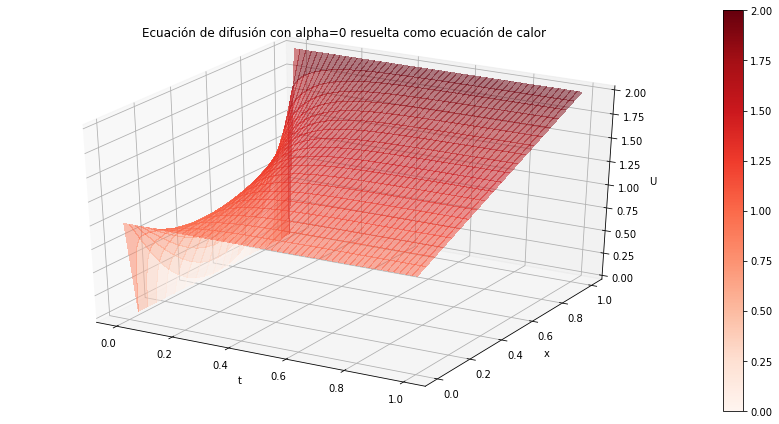

In [51]:
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 1 # Longitud de la barra

t0 = 0
tF = 1.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 1
U[-1, :] = 2

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Ecuación de difusión con alpha=0 resuelta como ecuación de calor')


plt.tight_layout()
plt.show()

Podemos observar dos detalles. En primer lugar, notamos que efectivamente obtuvimos la misma solución usando ambos códigos, utilizando el método para la ecuación de reacción-difusión, y el método de la ecuación de calor.
En segundo lugar, vemos que la curva que señalamos en el problema 1 desaparece, lo que convalida el comentario que hicimos de que se debía al término asociado a la reacción (podemos jugar también con el valor de alpha y notar que entre menor sea el valor de alpha mayor es la curvatura hacia abajo).